For that lab we will need keras, so go to your python.exe location and run:

`python -m pip install keras`

That will install keras and tensorflow libraries for you.

For model visualization we will also need [graphviz](https://graphviz.gitlab.io/_pages/Download/Download_windows.html) lib, so also please navigate to the link and install it, also adding it ti PATH variable.

We will work firstly with pretrained model:

In [3]:
import pydot
import numpy as np 
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from keras import backend as K
import keras
import numpy as np 

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [55]:


model = keras.applications.vgg16.VGG16()

### Getting weight and layers data 

Let us visualize this model

And also see the shapes of weights

In [19]:
weights = model.get_weights()
for weight in weights:
    print(weight.shape)

(3, 3, 3, 64)
(64,)
(3, 3, 64, 64)
(64,)
(3, 3, 64, 128)
(128,)
(3, 3, 128, 128)
(128,)
(3, 3, 128, 256)
(256,)
(3, 3, 256, 256)
(256,)
(3, 3, 256, 256)
(256,)
(3, 3, 256, 512)
(512,)
(3, 3, 512, 512)
(512,)
(3, 3, 512, 512)
(512,)
(3, 3, 512, 512)
(512,)
(3, 3, 512, 512)
(512,)
(3, 3, 512, 512)
(512,)
(25088, 4096)
(4096,)
(4096, 4096)
(4096,)
(4096, 1000)
(1000,)


In [20]:
layers = model.layers
for layer in layers:
    print(layer)

In [74]:
len(layers), len(weights)

(23, 32)

You might notice that the number of weights is greater than the number of layers. This is because we also have bias weights, in which we are not currently inerested in.

### Task 1 
Visualize weights from the input layer

In [51]:
l1 = model.get_weights()[0]
l1[0].shape

(3, 1, 75)

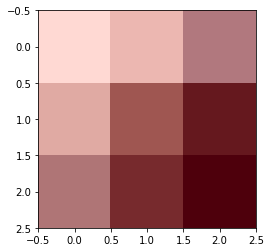

In [68]:
# your code to get filter from weights and than transform to the shape, that is compatible with cv2
# please notice the shape of the layer 
input_weights = model.layers[1].get_weights()[0]
input_weights = np.asarray(input_weights)
input_weights = np.transpose(input_weights, [3, 0, 1, 2])

img = input_weights[20].copy()

cv2.normalize(img,  img, 0, 255, cv2.NORM_MINMAX)
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.imshow(img.astype('uint8'))

### Task 2

Feed an image to the model and get an output image from some layer

You can see the output from each layer using this [guide](https://stackoverflow.com/a/41712013)

In [7]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
# load an image from file
img = load_img('E:\\obspy_data_processing\\ImP\\DSC_0754.jpg', target_size=(224, 224, 3))
# convert the image pixels to a numpy array
img = img_to_array(img)
img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))

# prepare the image for the VGG model
img = preprocess_input(img)

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [9]:
y = model.predict(img)

In [10]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers[1:]]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img)
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

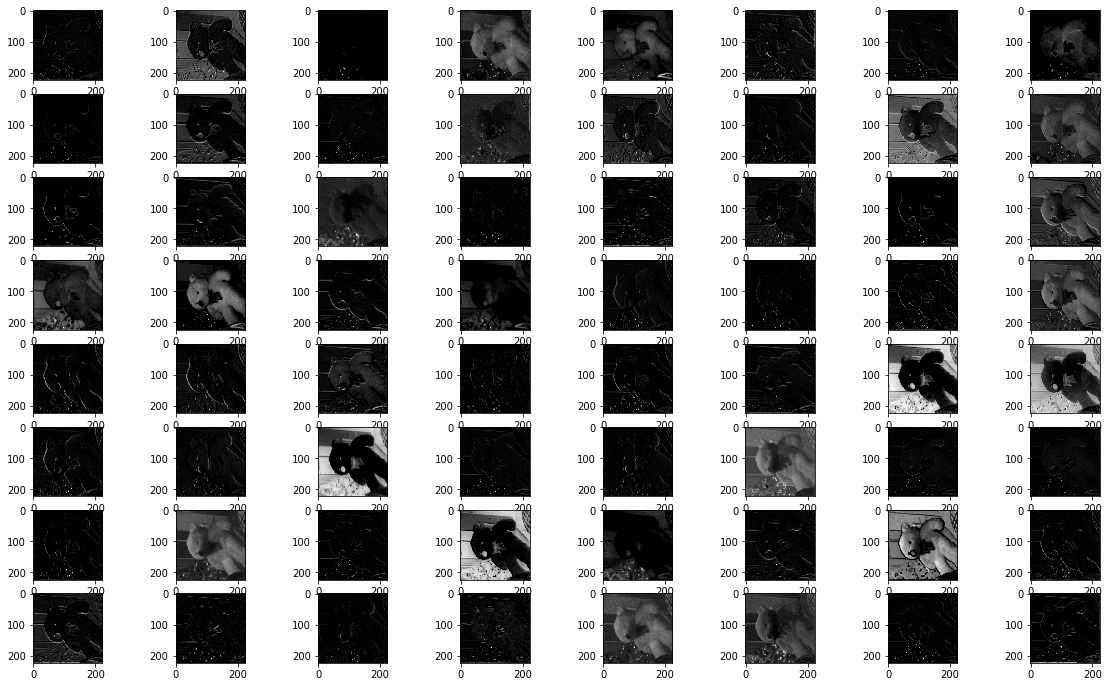

In [11]:
display_activation(activations, 8, 8, 1)

### Task 3 

Classify cats and dogs images with [features from CNN](https://keras.io/applications/#extract-features-with-vgg16) using SVM/KNN/etc...

### Building your own model

Consider the NON-working example below (x_train not defined)

In [13]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
model = VGG16(weights='imagenet', include_top=False)

In [14]:
%%time
list_of_labels = list()
list_of_features = list()
for ind, image_path,  in enumerate(os.listdir('E:\\obspy_data_processing\\ImP\\train')):
    if ind % 100 !=0:
        continue
    print (image_path)
    if image_path.find('cat')!=-1:
        list_of_labels.append(1)
    else:
        list_of_labels.append(0)
    img = image.load_img('E:\\obspy_data_processing\\ImP\\train'+'\\'+image_path, target_size=(224, 224,3))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    list_of_features.append(model.predict(x)[0].flatten())
    

cat.0.jpg
cat.10087.jpg
cat.10177.jpg
cat.10267.jpg
cat.10357.jpg
cat.10447.jpg
cat.10537.jpg
cat.10627.jpg
cat.10717.jpg
cat.10807.jpg
cat.10898.jpg
cat.10988.jpg
cat.11077.jpg
cat.11167.jpg
cat.11257.jpg
cat.11347.jpg
cat.11437.jpg
cat.11527.jpg
cat.11617.jpg
cat.11707.jpg
cat.11798.jpg
cat.11888.jpg
cat.11978.jpg
cat.12067.jpg
cat.12157.jpg
cat.12247.jpg
cat.12337.jpg
cat.12427.jpg
cat.1268.jpg
cat.1358.jpg
cat.1448.jpg
cat.1538.jpg
cat.1628.jpg
cat.1718.jpg
cat.1808.jpg
cat.1899.jpg
cat.1989.jpg
cat.2078.jpg
cat.2168.jpg
cat.2258.jpg
cat.2348.jpg
cat.2438.jpg
cat.2528.jpg
cat.2618.jpg
cat.2708.jpg
cat.2799.jpg
cat.2889.jpg
cat.2979.jpg
cat.3068.jpg
cat.3158.jpg
cat.3248.jpg
cat.3338.jpg
cat.3428.jpg
cat.3518.jpg
cat.3608.jpg
cat.3699.jpg
cat.3789.jpg
cat.3879.jpg
cat.3969.jpg
cat.4058.jpg
cat.4148.jpg
cat.4238.jpg
cat.4328.jpg
cat.4418.jpg
cat.4508.jpg
cat.4599.jpg
cat.4689.jpg
cat.4779.jpg
cat.4869.jpg
cat.4959.jpg
cat.5048.jpg
cat.5138.jpg
cat.5228.jpg
cat.5318.jpg
cat.5408.jpg
c

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
clf = KNeighborsClassifier(n_neighbors=2)

In [75]:
len(list_of_features)

250

In [76]:
clf.fit(list_of_features, list_of_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [77]:
clf.predict(list_of_features)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [78]:
from sklearn.metrics import roc_auc_score
roc_auc_score(clf.predict(list_of_features[1::2]), list_of_labels[1::2])

1.0

### Task 4

Create your own simple architecture and train CNN on [MNIST](https://keras.io/datasets/#mnist-database-of-handwritten-digits) dataset. Note that MNIST is 1 color channel dataset.
Test it on some hard images from the web, [such as](https://www.wpclipart.com/education/animal_numbers/animal_number_2.png).

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Activation
from keras.utils import np_utils
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
img_rows, img_cols = 28, 28

In [3]:
# Загружаем данные
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
# Преобразование размерности изображений
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [6]:
# Нормализация данных
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
X_train.shape

(60000, 28, 28, 1)

In [9]:
# Преобразуем метки в категории
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [16]:
# Создаем последовательную модель
model_3 = Sequential()

model_3.add(Conv2D(75, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.2))
model_3.add(Conv2D(100, (3, 3), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.2))

model_3.add(Conv2D(120, kernel_size=(3, 3), input_shape=input_shape))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.2))
model_3.add(Flatten())
model_3.add(Dense(500, activation='relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(10, activation='softmax'))

In [17]:
model_3.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print(model_3.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 75)        750       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 75)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 13, 13, 75)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 100)       67600     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 100)         0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 5, 5, 100)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 120)         108120    
__________

In [ ]:
# Обучаем сеть
#model_3.fit(X_train, Y_train, batch_size=128, epochs=2, validation_split=0.2, verbose=1)
#model_3.save('trained_model_4')
#model_3.save_weights('trained_model_4_weights')

In [26]:
from keras.models import load_model
model_3 = load_model('trained_model_4')
model_3.load_weights('trained_model_4_weights')

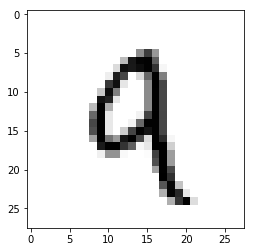

In [27]:
import cv2
img = X_test[125]
cv2.normalize(img,  img, 0, 255, cv2.NORM_MINMAX)
plt.imshow(255 - img.reshape((28,28)), cmap='gray')

In [28]:
model_3.predict(img.reshape((1, 28,28,1))).argmax()

9

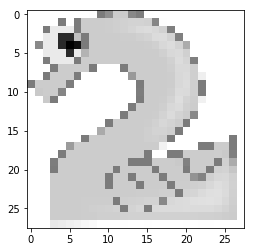

In [7]:
import cv2
hard_image = cv2.imread('animal_number_2.png', 0)
hard_image = cv2.resize(hard_image, (28, 28))
hard_image = hard_image.reshape(28,28)
cv2.normalize(hard_image,  hard_image, 0, 255, cv2.NORM_MINMAX)
plt.imshow(hard_image, cmap='gray')

In [8]:
model_3.predict(hard_image.reshape((1, 28,28,1))).argmax()

NameError: name 'model_3' is not defined

### Task 5

Augment MNIST data using [ImageDataGenerator](https://keras.io/preprocessing/image/) and color inversion + visualize (or save) augmented images.
Train our model on augmented data and compare the results on your images from the web.

In [38]:
from keras.preprocessing.image import ImageDataGenerator

In [39]:
X_train.shape


(60000, 28, 28, 1)

In [40]:
X_train_inverted = 255 - X_train

In [41]:
X_train_all = np.concatenate((X_train, X_train_inverted), axis=0)
Y_train_all = np.concatenate((Y_train, Y_train), axis=0)

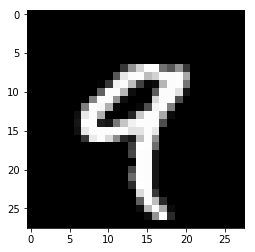

In [42]:
img = X_train_all[60004]
cv2.normalize(img,  img, 0, 255, cv2.NORM_MINMAX)

plt.imshow(255 - img.reshape((28,28)), cmap='gray')


In [44]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=False)

In [45]:
datagen.fit(X_train_inverted)

In [46]:
model_3.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model_3.fit_generator(datagen.flow(X_train_inverted, Y_train, batch_size=128),
                    steps_per_epoch=len(X_train_inverted)/128, epochs=3)

Epoch 1/3
469/468 [==============================] - 2227s 5s/step - loss: 0.9873 - acc: 0.6873
Epoch 2/3
469/468 [==============================] - 2365s 5s/step - loss: 0.5059 - acc: 0.8353
Epoch 3/3
469/468 [==============================] - 2234s 5s/step - loss: 0.4181 - acc: 0.8663


In [49]:
model_3.save('trained_model_4_with_generator')
model_3.save_weights('trained_model_4_weights_with_generator')

6


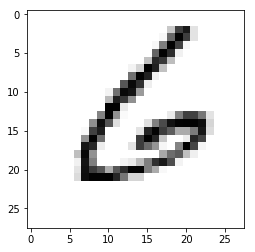

In [59]:
ind = 60000-2
img = X_train_all[ind]
cv2.normalize(img,  img, 0, 255, cv2.NORM_MINMAX)

plt.imshow(255 - img.reshape((28,28)), cmap='gray')
print(Y_train_all[ind].argmax())


In [60]:
img = X_train_all[ind]
model_3.predict(255 - img.reshape((1, 28,28,1))).argmax()

6

In [93]:
hard_image = cv2.imread('animal_number_9.png', 0)
hard_image = cv2.resize(hard_image, (28, 28))

In [94]:
hard_image = hard_image.reshape((28,28,1))
hard_image.shape

(28, 28, 1)

In [95]:
model_3.predict(hard_image.reshape((1, 28,28,1))).argmax()

5